In [2]:
import pandas as pd
file_path = "dns_query_flood_dataset.csv"
df = pd.read_csv(file_path)

# Inspect the dataset
print(df.head())
print(df.info())

      timestamp        src_ip          dst_ip      query_name  query_type  \
0  1.733575e+09  192.168.74.1  192.168.74.131     test.local.           1   
1  1.733575e+09  192.168.74.1  192.168.74.131     google.com.           1   
2  1.733575e+09  192.168.74.1  192.168.74.131     openai.com.           1   
3  1.733575e+09  192.168.74.1  192.168.74.131  wikipedia.org.           1   
4  1.733575e+09  192.168.74.1  192.168.74.131     amazon.com.           1   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764719 entries, 0 to 764718
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   764719 non-null  float64
 1   src_ip      764719 non-null  object 
 2   dst_ip      764719 non-null  object 
 3   query_name  764719 non-null  object 
 4   query_type  764719 non-null  int64  
 5   label       764719 non-null  int64  
dtypes: float64(1), int64

In [5]:
import socket
import struct

def ip_to_int(ip):
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except:
        return 0

df["src_ip"] = df["src_ip"].apply(ip_to_int)
df["dst_ip"] = df["dst_ip"].apply(ip_to_int)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["query_name"] = le.fit_transform(df["query_name"].astype(str))

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11992
           1       1.00      1.00      1.00    140952

    accuracy                           1.00    152944
   macro avg       1.00      1.00      1.00    152944
weighted avg       1.00      1.00      1.00    152944



In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print(f"Cross-validation F1-scores: {scores}")
print(f"Mean F1-score: {scores.mean()}")

Cross-validation F1-scores: [1. 1. 1. 1. 1.]
Mean F1-score: 1.0


In [10]:
print(df['label'].value_counts())

label
1    704219
0     60500
Name: count, dtype: int64


In [15]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify new class distribution
print(pd.Series(y_resampled).value_counts())


label
0    704219
1    704219
Name: count, dtype: int64


In [16]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Stratified KFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12100
           1       1.00      1.00      1.00    140844

    accuracy                           1.00    152944
   macro avg       1.00      1.00      1.00    152944
weighted avg       1.00      1.00      1.00    152944

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12100
           1       1.00      1.00      1.00    140844

    accuracy                           1.00    152944
   macro avg       1.00      1.00      1.00    152944
weighted avg       1.00      1.00      1.00    152944

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12100
           1       1.00      1.00      1.00    140844

    accuracy                           1.00    152944
   macro avg       1.00      1.00      1.00    152944
weighted avg       1.00      1.00      1.00    152944

              preci

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.set_index('timestamp', inplace=True)
df_aggregated = df.resample('1S').agg({'src_ip': 'count', 'query_name': 'nunique'})

<ipython-input-18-084235b19593>:3: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_aggregated = df.resample('1S').agg({'src_ip': 'count', 'query_name': 'nunique'})


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11992
           1       1.00      1.00      1.00    140952

    accuracy                           1.00    152944
   macro avg       1.00      1.00      1.00    152944
weighted avg       1.00      1.00      1.00    152944



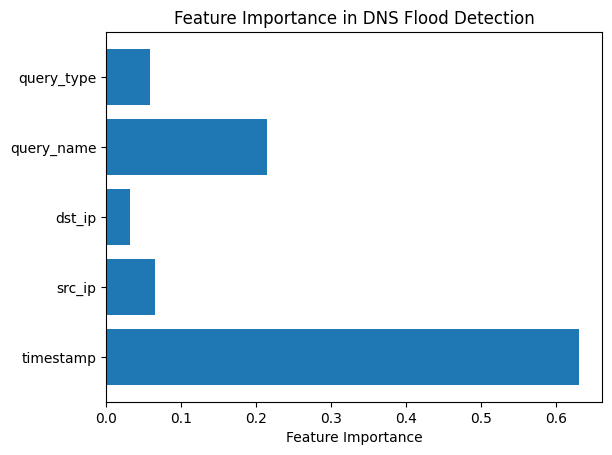

In [20]:
import matplotlib.pyplot as plt

# Plot feature importance
feature_importances = model.feature_importances_
features = X.columns

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in DNS Flood Detection')
plt.show()

In [21]:
import joblib

# Save the trained model
joblib.dump(model, 'dns_flood_detection_model.pkl')


['dns_flood_detection_model.pkl']